## Loading the Data

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set()
df = pd.read_csv("palmer_penguins.csv")
df = df.dropna()

## Preparing the Data

In [68]:
# making individual dataframes for each of the two penguin species of interest
adelie = df[df.species == "Adelie"]
chinstrap = df[df.species == "Chinstrap"]

# Also one combined dataframe that contains information on both species
options = ['Adelie','Chinstrap']
df_AC = df[df['species'].isin(options)]
df_AC = df_AC.dropna()

In [11]:
from sklearn.model_selection import train_test_split

def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1
           
# Create target value array
X = df_AC[["bill_length_mm", "bill_depth_mm"]].to_numpy()
y = df_AC["species"].map(make_labels).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

## Data Visualization

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,10))


ax1.scatter(adelie.bill_length_mm, 
            adelie.bill_depth_mm, 
            color = "darkorange", 
            label = "adelie")
ax1.scatter(chinstrap.bill_length_mm, 
            chinstrap.bill_depth_mm, 
            color = "mediumorchid", 
            label = "chinstrap")
ax1.set_xlabel("Bill Length [mm]", fontsize = 15)
ax1.set_ylabel("Bill Depth [mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)

plt.show()


## Classification Report

In [12]:
from sklearn.metrics import classification_report


stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")

tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report Depth = 6")
print(classification_report(y_test, tree_y_pred), "\n")

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report Depth = 15")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")


forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")


ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        60
           1       0.79      1.00      0.88        26

    accuracy                           0.92        86
   macro avg       0.89      0.94      0.91        86
weighted avg       0.94      0.92      0.92        86
 

Tree Classification Report Depth = 6
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.93      1.00      0.96        26

    accuracy                           0.98        86
   macro avg       0.96      0.98      0.97        86
weighted avg       0.98      0.98      0.98        86
 

Tree Classification Report Depth = 15
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.93      1.00      0.96        26

    accuracy                           0.98        86
   macro avg       0.

## Visualizing the Classifiers

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')
clf5 = DecisionTreeClassifier(max_depth=6, random_state=42)
clf6 = DecisionTreeClassifier(max_depth=15, random_state=42)
clf7 = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
clf8 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)



from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

#fig = plt.figure(figsize=(10,8))

#fig, axes = plt.subplots(2, 3, figsize=(10, 3)
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM','Decision Tree Depth =6','Bagging Classifier','Ada Boost']

for clf, lab in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8],
                         labels):

    clf.fit(X_train, y_train)
    #ax = plt.subplot(gs[grd[0], grd[1]])
    #fig = plot_decision_regions(X=X, y=y, clf=clf,ax=axes[i], legend=2)
    #plt.title(lab)

    #)
#plt.show()

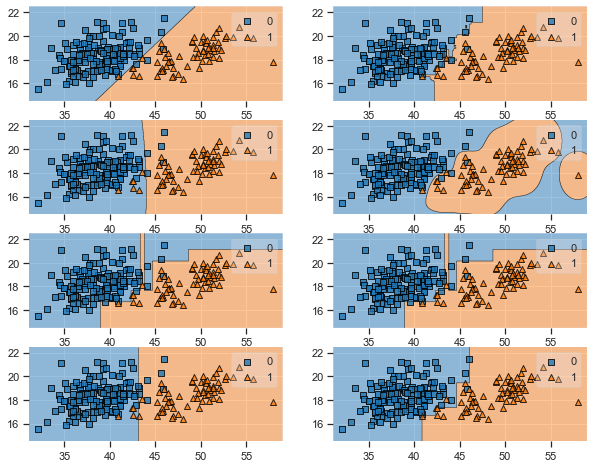

In [67]:
fig, axes = plt.subplots(4,2 , figsize=(10, 8))

leg = ["Adelie", "Chinstrap"]
fig = plot_decision_regions(X=X, y=y, clf=clf1, ax=axes[0,0], legend=1)
fig = plot_decision_regions(X=X, y=y, clf=clf2, ax=axes[0,1], legend=1)
fig = plot_decision_regions(X=X, y=y, clf=clf3, ax=axes[1,0], legend=1)
fig = plot_decision_regions(X=X, y=y, clf=clf4, ax=axes[1,1], legend=1)
fig = plot_decision_regions(X=X, y=y, clf=clf5, ax=axes[2,0], legend=1)
fig = plot_decision_regions(X=X, y=y, clf=clf6, ax=axes[2,1], legend=1)
fig = plot_decision_regions(X=X, y=y, clf=clf7, ax=axes[3,0], legend=1)
fig = plot_decision_regions(X=X, y=y, clf=clf8, ax=axes[3,1], legend=1)

plt.show()

## Increasing Features

In [7]:
from sklearn.ensemble import RandomForestClassifier

X = df_AC[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"ADA Boost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       1.00      0.87      0.93        30

    accuracy                           0.95        86
   macro avg       0.97      0.93      0.95        86
weighted avg       0.96      0.95      0.95        86
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.96      0.90      0.93        30

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.95      0.95      0.95        86
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.96      0.90      0.93        30

    accuracy                           0.95        86
   macro avg       0.96      0.94     

## Feature Importance

In [8]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.48400000000000004
bill_depth_mm 0.11000000000000001
flipper_length_mm 0.3340000000000001
body_mass_g 0.07200000000000001


In [9]:
#stump tree6 tree15 bag forest ada